# Weather prediction on São Paulo using NeuralProphet
### NeuralProphet is pretty good working with time series, so we will use it

Dataset: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities

Installing NeuralProphet

In [ ]:
#!pip install neuralprophet

Importing libraries

In [107]:
import pandas as pd
from matplotlib import pyplot as plt
from neuralprophet import NeuralProphet
import numpy as np
import seaborn as sns

In [111]:
import warnings
warnings.filterwarnings('ignore')

Importing the city_temperature.csv and saving as df

In [112]:
df = pd.read_csv('city_temperature.csv')

In [113]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


Filtering rows that matches with São Paulo City

In [115]:
sp = df[df['City'] == 'Sao Paulo']
sp

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1301306,South/Central America & Carribean,Brazil,NaN,Sao Paulo,1,1,1995,71.8
1301307,South/Central America & Carribean,Brazil,NaN,Sao Paulo,1,2,1995,73.5
1301308,South/Central America & Carribean,Brazil,NaN,Sao Paulo,1,3,1995,72.7
1301309,South/Central America & Carribean,Brazil,NaN,Sao Paulo,1,4,1995,72.7
1301310,South/Central America & Carribean,Brazil,NaN,Sao Paulo,1,5,1995,75.3
...,...,...,...,...,...,...,...,...
1310567,South/Central America & Carribean,Brazil,NaN,Sao Paulo,5,9,2020,61.7
1310568,South/Central America & Carribean,Brazil,NaN,Sao Paulo,5,10,2020,63.7
1310569,South/Central America & Carribean,Brazil,NaN,Sao Paulo,5,11,2020,65.9
1310570,South/Central America & Carribean,Brazil,NaN,Sao Paulo,5,12,2020,66.8


In [116]:
sp = sp.drop(columns = ['State'])
sp

,Region,Country,City,Month,Day,Year,AvgTemperature
1301306,South/Central America & Carribean,Brazil,Sao Paulo,1,1,1995,71.8
1301307,South/Central America & Carribean,Brazil,Sao Paulo,1,2,1995,73.5
1301308,South/Central America & Carribean,Brazil,Sao Paulo,1,3,1995,72.7
1301309,South/Central America & Carribean,Brazil,Sao Paulo,1,4,1995,72.7
1301310,South/Central America & Carribean,Brazil,Sao Paulo,1,5,1995,75.3
...,...,...,...,...,...,...,...
1310567,South/Central America & Carribean,Brazil,Sao Paulo,5,9,2020,61.7
1310568,South/Central America & Carribean,Brazil,Sao Paulo,5,10,2020,63.7
1310569,South/Central America & Carribean,Brazil,Sao Paulo,5,11,2020,65.9
1310570,South/Central America & Carribean,Brazil,Sao Paulo,5,12,2020,66.8


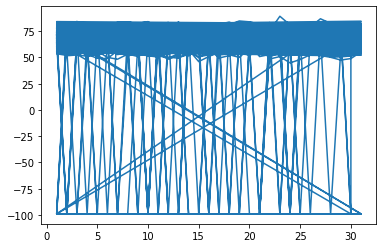

In [117]:
plt.plot(sp['Day'], sp['AvgTemperature'])
plt.show()

## Temperatures are weird and in Fahrenheit, let's convert them to Celsius
<p>(Fahrenheit − 32) × 5/9  = Celsius</p>

In [118]:
sp['AvgTemperature'] = sp.apply(lambda x: (x['AvgTemperature'] - 32) * 5/9,axis=1)
sp

,Region,Country,City,Month,Day,Year,AvgTemperature
1301306,South/Central America & Carribean,Brazil,Sao Paulo,1,1,1995,22.111111
1301307,South/Central America & Carribean,Brazil,Sao Paulo,1,2,1995,23.055556
1301308,South/Central America & Carribean,Brazil,Sao Paulo,1,3,1995,22.611111
1301309,South/Central America & Carribean,Brazil,Sao Paulo,1,4,1995,22.611111
1301310,South/Central America & Carribean,Brazil,Sao Paulo,1,5,1995,24.055556
...,...,...,...,...,...,...,...
1310567,South/Central America & Carribean,Brazil,Sao Paulo,5,9,2020,16.500000
1310568,South/Central America & Carribean,Brazil,Sao Paulo,5,10,2020,17.611111
1310569,South/Central America & Carribean,Brazil,Sao Paulo,5,11,2020,18.833333
1310570,South/Central America & Carribean,Brazil,Sao Paulo,5,12,2020,19.333333


## We can remove temperatures below 0°
<img src="spTemperature.jpg" width = "60%" style="border-style:solid;">

Listing temperatures below 0°

In [119]:
sp.loc[sp['AvgTemperature'] < 0]

,Region,Country,City,Month,Day,Year,AvgTemperature
1302323,South/Central America & Carribean,Brazil,Sao Paulo,10,14,1997,-72.777778
1302324,South/Central America & Carribean,Brazil,Sao Paulo,10,15,1997,-72.777778
1302330,South/Central America & Carribean,Brazil,Sao Paulo,10,21,1997,-72.777778
1302334,South/Central America & Carribean,Brazil,Sao Paulo,10,25,1997,-72.777778
1302335,South/Central America & Carribean,Brazil,Sao Paulo,10,26,1997,-72.777778
...,...,...,...,...,...,...,...
1310186,South/Central America & Carribean,Brazil,Sao Paulo,4,24,2019,-72.777778
1310208,South/Central America & Carribean,Brazil,Sao Paulo,5,16,2019,-72.777778
1310209,South/Central America & Carribean,Brazil,Sao Paulo,5,17,2019,-72.777778
1310210,South/Central America & Carribean,Brazil,Sao Paulo,5,18,2019,-72.777778


Removing them

In [120]:
sp = sp.drop(sp[sp['AvgTemperature'] <= 0].index)

In [121]:
sp.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
1301306,South/Central America & Carribean,Brazil,Sao Paulo,1,1,1995,22.111111
1301307,South/Central America & Carribean,Brazil,Sao Paulo,1,2,1995,23.055556
1301308,South/Central America & Carribean,Brazil,Sao Paulo,1,3,1995,22.611111
1301309,South/Central America & Carribean,Brazil,Sao Paulo,1,4,1995,22.611111
1301310,South/Central America & Carribean,Brazil,Sao Paulo,1,5,1995,24.055556


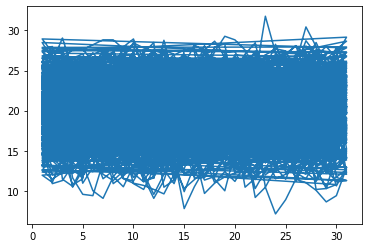

In [122]:
plt.plot(sp['Day'], sp['AvgTemperature'])
plt.show()

## Plotting monthly trends just for curiosity

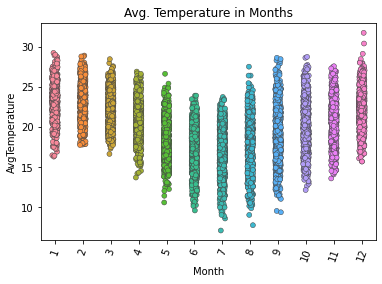

In [149]:
plot = sns.stripplot(x='Month', y='AvgTemperature', size = 5, linewidth=0.5, data=sp)
plt.setp(plot.get_xticklabels(), rotation = 70)
plt.title('Avg. Temperature in Months')
plt.show()

## Concatenating Year, Month and Day columns, converting to string

In [124]:
sp["Date"] = sp['Year'].astype(str) +'-'+ sp['Month'].astype(str) +'-'+ sp['Day'].astype(str)
sp.head()

,Region,Country,City,Month,Day,Year,AvgTemperature,Date
1301306,South/Central America & Carribean,Brazil,Sao Paulo,1,1,1995,22.111111,1995-1-1
1301307,South/Central America & Carribean,Brazil,Sao Paulo,1,2,1995,23.055556,1995-1-2
1301308,South/Central America & Carribean,Brazil,Sao Paulo,1,3,1995,22.611111,1995-1-3
1301309,South/Central America & Carribean,Brazil,Sao Paulo,1,4,1995,22.611111,1995-1-4
1301310,South/Central America & Carribean,Brazil,Sao Paulo,1,5,1995,24.055556,1995-1-5


Converting dates to DateTime

In [125]:
sp['Date'] = pd.to_datetime(sp['Date'])
sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9174 entries, 1301306 to 1310571
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          9174 non-null   object        
 1   Country         9174 non-null   object        
 2   City            9174 non-null   object        
 3   Month           9174 non-null   int64         
 4   Day             9174 non-null   int64         
 5   Year            9174 non-null   int64         
 6   AvgTemperature  9174 non-null   float64       
 7   Date            9174 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 645.0+ KB


## Creating new DataFrame and fitting

In [140]:
data = sp[['Date', 'AvgTemperature']]
data.columns = ['ds','y']
data.head()

,ds,y
1301306,1995-01-01,22.111111
1301307,1995-01-02,23.055556
1301308,1995-01-03,22.611111
1301309,1995-01-04,22.611111
1301310,1995-01-05,24.055556


In [144]:
m = NeuralProphet()
m.fit(data, freq = 'D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.433% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 105


  0%|          | 0/149 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.92E-02, min: 1.98E+00


  0%|          | 0/149 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.92E-02, min: 1.50E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.56E-02
Epoch[105/105]: 100%|██████████| 105/105 [00:33<00:00,  3.15it/s, SmoothL1Loss=0.0106, MAE=2.16, RMSE=2.68, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.804435,22.451534,27.827520,0.0
1,0.306366,11.695016,14.855002,0.0
2,0.030289,3.465602,4.291333,0.0
3,0.012521,2.351857,2.906154,0.0
4,0.012379,2.339078,2.887573,0.0
...,...,...,...,...
100,0.010732,2.165162,2.687551,0.0
101,0.010699,2.162772,2.684918,0.0
102,0.010681,2.161895,2.683695,0.0
103,0.010658,2.159589,2.681395,0.0


## Predicting

In [145]:
future = m.make_future_dataframe(data, periods = 3650)
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.433% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.973% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.973% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


In [146]:
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2020-05-14,None,18.136553,NaN,20.009239,-1.914997,0.042311
1,2020-05-15,None,18.054075,NaN,20.008894,-2.006142,0.051323
2,2020-05-16,None,17.942162,NaN,20.008549,-2.093165,0.026778
3,2020-05-17,None,17.778101,NaN,20.008204,-2.175763,-0.054341
4,2020-05-18,None,17.687859,NaN,20.007858,-2.253663,-0.066338


## Plotting the prediction

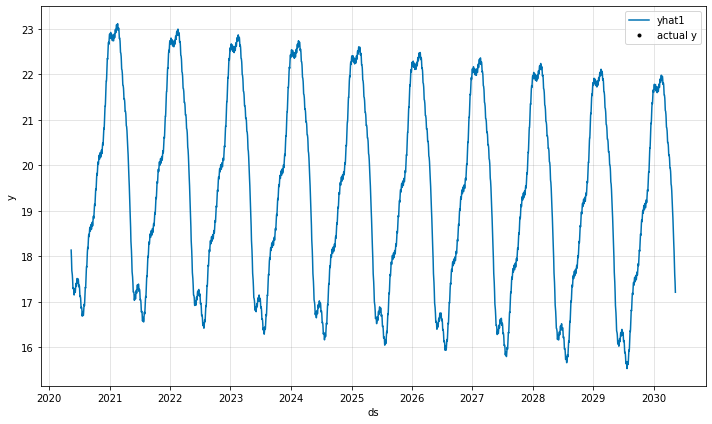

In [147]:
plot1 = m.plot(forecast)

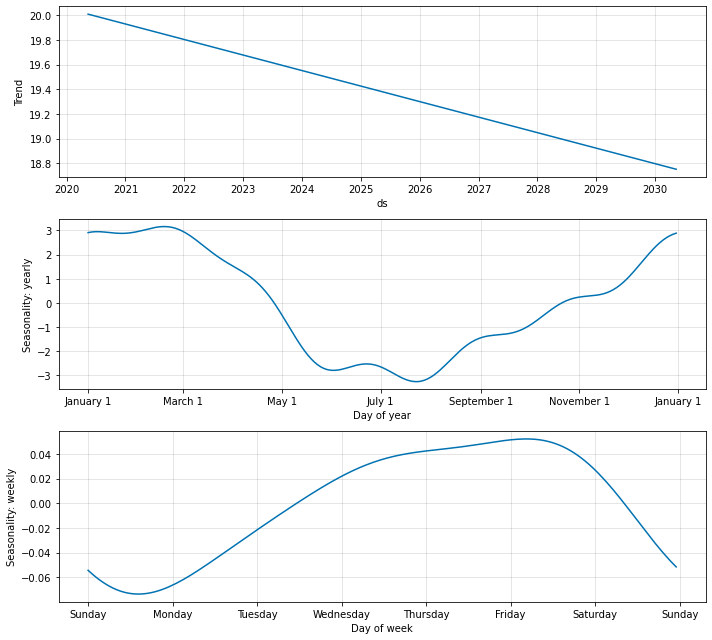

In [148]:
plt2 = m.plot_components(forecast)

## Accordingly to our data and Neural Prophet, the temperature of São Paulo will drop 1°C in the next ten years